<a href="https://colab.research.google.com/github/sachingavande4599/Retail-Sales-prediction/blob/main/Indivisual_Retail_Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** sachin gavande


# **Project Summary -**

• In the Rossmann sales prediction project there is a dataset which contains sales information.

• The shape of Rossmann dataset = 1017209, 8 and Store dataset = 1115, 10.

• In both dataset ‘Store’ column is common. So we do inner join on the basis of column ‘Store’.

• This dataset is a live dataset of Rossmann Stores. On analyzing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem.

In this Notebook we are going to work on following topics:-

Analyzing the dataset by using Exploratory Data Analysis using exponential moving averages analysis trends and seasonality in Rossmann dataset Analyze Regression using following prediction analysis.

A) Linear Regression Analysis.

B) Elastic Regression (Lasso & Ridge Regression).

C) Decision tree.


# **GitHub Link -**

https://github.com/sachingavande4599/Retail-Sales-prediction

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**

**You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

df_Rossmann  = pd.read_csv('/content/drive/MyDrive/ML CAPSTON/Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/MyDrive/ML CAPSTON/store (1).csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df_Rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# Dataset First Look
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df_Rossmann.shape

(1017209, 9)

In [6]:
# Dataset Rows & Columns count
df_store.shape

(1115, 10)

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df_Rossmann[df_Rossmann.duplicated()])

0

In [8]:
# Dataset Duplicate Value Count
len(df_store[df_store.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df_Rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
df_Rossmann.isnull().columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

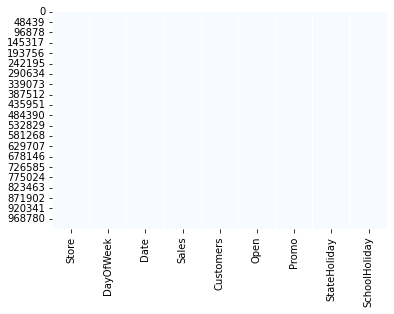

In [11]:
# Visualizing the missing values
sns.heatmap(df_Rossmann.isnull(), cmap='Blues', cbar=False)

In [12]:
# Missing Values/Null Values Count
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

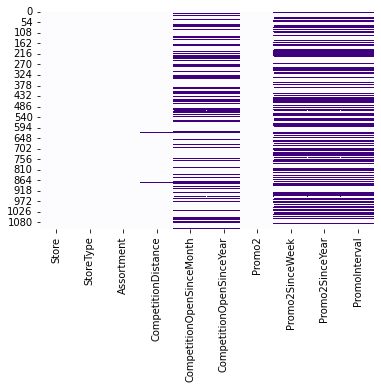

In [13]:
# Visualizing the missing values
sns.heatmap(df_store.isnull(),cmap='Purples', cbar=False)

### What did you know about your dataset?



 The retail sales prediction dataset contains information about various stores and their sales on a given day.

2. The dataset has 1017209 rows and 9 columns with no missing or null values and no duplicate values.

3. The dataset includes various features such as the store ID, store type, sales, number of customers, whether the store was open or closed, state holidays, school holidays, the distance to the nearest competitor store, the opening date of the nearest competitor store, information about promotions, and the interval of promotions.

4. This information can be used to build a predictive model that forecasts the sales of retail stores on any given day. With this data, businesses can gain valuable insights into their sales performance and make informed decisions about their operations.



## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns

df_Rossmann.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
# Dataset Columns

df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [16]:
# Dataset Describe

df_Rossmann.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [17]:
# Dataset Describe

df_store.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [18]:
df_Rossmann.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### Variables Description 

**Rossman Dataset**

* Store : Identifier for each store

* DayOfWeek : The day of the week, with Monday being 1 and Sunday being 7

* Sales : The amount of sales made at the store on that day

* Customers : The number of customers who visited the store on that day

* Open : Indicator of whether the store was open on that day (0 or 1)

* Promo : Indicator of whether there was a promotion taking place at the store on that day (0 or 1)

* SchoolHoliday : Indicator of whether it was a school holiday on that day (0 or 1)



**The statistics provided for each variable are:**

* Count: Total number of records

* Mean: Average value of the variable

* Standard Deviation: Measure of the spread of the variable's values

* Minimum: Smallest value in the variable

* 25th Percentile: Value below which 25% of the variable's values fall

* Median (50th Percentile): Middle value of the variable

* 75th Percentile: Value below which 75% of the variable's values fall

* Maximum: Largest value in the variable




**Store Dataset**

**This data set includes information about different stores, including the following variables:**

* Store: Identifier for each store

* CompetitionDistance: The distance of the nearest competitor from the store

* CompetitionOpenSinceMonth: Month the nearest competitor was opened

* CompetitionOpenSinceYear: Year the nearest competitor was opened

* Promo2: Indicator of whether the store is running a promotion

* Promo2SinceWeek: Week the store started running the promotion

* Promo2SinceYear: Year the store started running the promotion


**The statistics provided give an overview of the distribution of each variable's values.**

* The data for the variables "CompetitionDistance" has a mean of 5404.90, std dev of 7663.17, and a range of 20 to 75860 with 3 missing values.

* "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" have means of 7.22 and 2008.67, std dev of 3.21 and 6.20, and ranges of 1-12 and 1900-2015 with 354 missing values.

* "Promo2" has a mean of 0.51 and no missing values, while "Promo2SinceWeek" and 

* "Promo2SinceYear" have means of 23.60 and 2011.76, std dev of 14.14 and 1.67, and ranges of 1-50 and 2009-2015 with 544 missing values.

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.

for i in df_Rossmann.columns.tolist():
  print("No. of unique values in ",i,"is",df_Rossmann[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


In [20]:
# Check Unique Values for each variable.

for i in df_store.columns.tolist():
  print("No. of unique values in ",i,"is",df_store[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
# Convert data types for columns as needed
# ros_df['Date'] = pd.to_datetime(ros_df['Date'])
df_Rossmann['StateHoliday'] = df_Rossmann['StateHoliday'].astype('category')



In [22]:
# Convert data types for columns as needed
df_store['StoreType'] = df_store['StoreType'].astype('category')
df_store['Assortment'] = df_store['Assortment'].astype('category')

In [23]:
df_Rossmann.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [24]:
# extract year, month, day and week of year from "Date"

df_Rossmann['Date']=pd.to_datetime(df_Rossmann['Date'])
df_Rossmann['Year'] = df_Rossmann['Date'].apply(lambda x: x.year)
df_Rossmann['Month'] = df_Rossmann['Date'].apply(lambda x: x.month)

In [25]:
# Rename columns as needed

df_Rossmann.rename(columns={'CompetitionDistance': 'DistanceToNearestCompetitor',
'CompetitionOpenSinceMonth': 'CompetitorOpenMonth',
'CompetitionOpenSinceYear': 'CompetitorOpenYear'}, inplace=True)

In [26]:
df_Rossmann = df_Rossmann.drop(['Date'],axis=1)

In [27]:
# remove features
df_store = df_store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

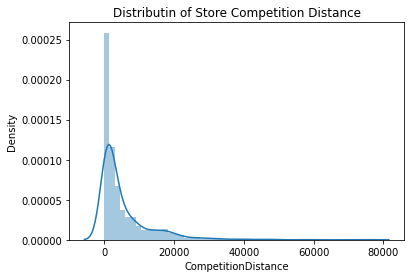

In [28]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(df_store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [29]:
# replace missing values in CompetitionDistance with median for the store dataset

df_store.CompetitionDistance.fillna(df_store.CompetitionDistance.median(), inplace=True)

### What all manipulations have you done and insights you found?

* In this dataset we have found sales data from 2013 to 2015 

* In this dataset we extracted the 'Year', 'Month', 'Day', and 'WeekOfYear' and created new columns from date column.  

* In this dataset we sorted the values by date and store columns in descending ascending order

* The sales data is for 5 stores and covers the date range from 2015-07-31 to 2015-07-31.

* The stores were open on the day of the sales, and some stores were running promotions.

* It was not a state holiday or a school holiday on the day of the sales.
The data includes sales data for the month of July in the year 2015.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [30]:
#visualization on  rossmann data set

#### Chart - 1

In [31]:
# Chart - 1 visualization code

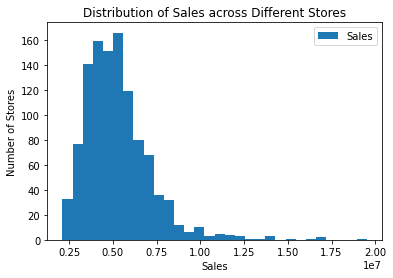

In [32]:
#grouping the data by store
df_grouped_by_store = df_Rossmann.groupby(['Store']).agg({'Sales':'sum'})

#plotting the distribution of sales across different stores
df_grouped_by_store.plot(kind='hist', bins=30)
plt.xlabel("Sales")
plt.ylabel("Number of Stores")
plt.title("Distribution of Sales across Different Stores")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a histogram to visualize the distribution of sales across different stores because histograms are used to represent the distribution of continuous data, which is what the sales data is in this case. A histogram breaks down the data into intervals or bins and shows the frequency of data points in each bin. This helps to identify the range of values that the sales data covers and how the data is spread out across that range. The shape of the histogram can provide insight into the underlying distribution of the data, such as whether it is symmetrical, skewed, or multimodal. Overall, a histogram is an effective way to represent the distribution of sales across different stores.

##### 2. What is/are the insight(s) found from the chart?

1_The range of sales for different stores can be seen from the x-axis

The frequency or number of stores can be seen from the y-axis, which shows how many stores have sales within a certain range.
The shape of the histogram can provide information about the distribution of sales across different stores, such as whether it is symmetrical or skewed. For example, if the histogram is symmetrical, it means that the sales data is evenly spread out across the range, while if it is skewed, it means that the sales data is not evenly spread out.
The number of stores with high sales can be seen from the frequency or height of the histogram in certain ranges on the x-axis. This can give information about the performance of different stor




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the histogram of the distribution of sales across different stores can help create a positive business impact in the following ways:
1)Identifying top-performing stores: The histogram can show the frequency of stores with high sales, which can help identify the top-performing stores
2)Identifying under-performing stores: The histogram can also show the frequency of stores with low sales, which can help identify the under-performing stores. These stores can be studied further to understand what is not working well and what changes can be made to improve their performance. 
There are no specific insights that lead to negative growth based on the histogram of the distribution of sales across different stores. However, it is important to note that the insights gained from this histogram are just one aspect of the data and should be combined with other data and analysis to make informed business decisions.





2)Identifying under-performing stores: The histogram can also show the frequency of stores with low sales, which can help identify the under-performing stores. These stores can be studied further to understand what is not working well and what changes can be made to improve their performance. 

There are no specific insights that lead to negative growth based on the histogram of the distribution of sales across different stores. However, it is important to note that the insights gained from this histogram are just one aspect of the data and should be combined with other data and analysis to make informed business decisions.




#### Chart - 2

In [33]:
# Chart - 2 visualization code

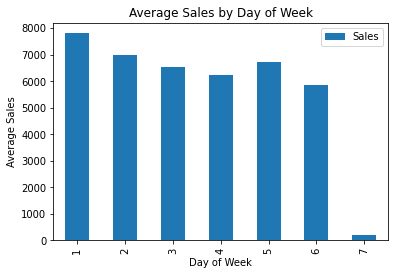

In [34]:
#grouping the data by day of the week
df_grouped_by_day_of_week = df_Rossmann.groupby(['DayOfWeek']).agg({'Sales':'mean'})

#plotting the average sales by day of the week
df_grouped_by_day_of_week.plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.title("Average Sales by Day of Week")
plt.show()


##### 1. Why did you pick the specific chart?

The bar plot represents the average sales of a retail store grouped by whether or not a promotional offer was running during that period


##### 2. What is/are the insight(s) found from the chart?

* The average sales for each day of the week can be seen from the height of the bars.
   









*  The pattern of sales across different days of the week can be seen from the bar plot, which can give information about the sales trends for each day of the week



*   the plot may show that sales are higher on weekends and lower on weekdays.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 *Optimizing store hours: The plot can show which days of the week have higher orlower sales, which can inform the business about when they should open and close their stores. For example, if the plot shows that sales are lower on weekdays, the business may decide to close the store earlier on weekdays and open later on weekends.

*Improving customer engagement: The plot can provide information about when customers are most likely to visit the store, which can help the business improve customer engagement. For example, if the plot shows that sales are higher on weekends, the business may decide to offer more promotions and discounts on weekends to attract more customers.

There are no specific insights that lead to negative growth based on the bar plot of average sales by day of the week. However, it is important to note that the insights gained from this plot are just one aspect of the data and should be combined with other data and analysis to make informed business decisions.

#### Chart - 3

In [35]:
# Chart - 3 visualization code

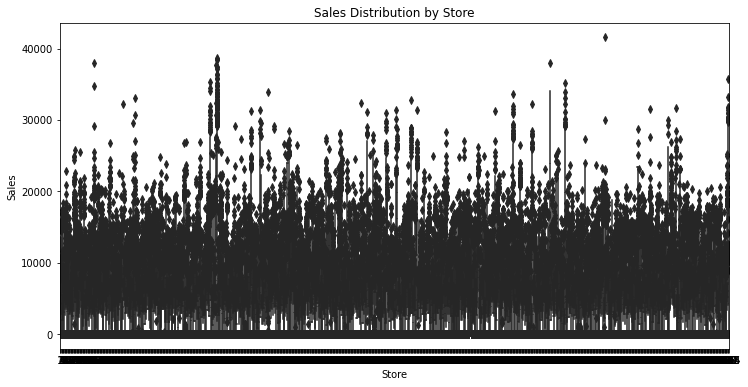

In [36]:
# Plot box plot of sales distribution by store.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Sales', data=df_Rossmann, color='Purple')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales Distribution by Store')
plt.show()

##### 1. Why did you pick the specific chart?

* A box plot was chosen to display the distribution of sales across different stores because it provides a clear representation of the median, quartiles, and outliers of the sales data.

##### 2. What is/are the insight(s) found from the chart?

 A box plot was chosen to display the distribution of sales across different stores because it provides a clear representation of the median, quartiles, and outliers of the sales data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 The insights gained from the chart could potentially help create a positive business impact by allowing for identification of stores with higher or lower sales performance, enabling the company to make data-driven decisions to optimize sales and improve overall business performance.

#### Chart - 4

In [37]:
# Chart - 4 visualization code

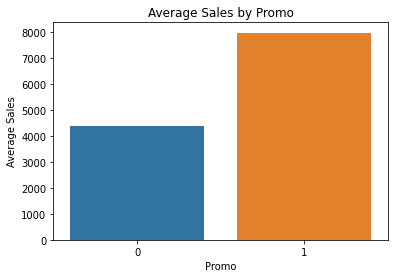

In [38]:
# Group the data by 'Promo' and aggregate the 'Sales' column
promo_sales = df_Rossmann.groupby('Promo').agg({'Sales':'mean'})

# Plot a bar chart to visualize the average sales by Promo
sns.barplot(x=promo_sales.index, y=promo_sales['Sales'])

# Label the x-axis
plt.xlabel("Promo")

# Label the y-axis
plt.ylabel("Average Sales")

# Give the plot a title
plt.title("Average Sales by Promo")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot was picked to visualize the impact of promotional offers on sales because it is a simple and straightforward way to compare the average sales between two groups (when a promotion is running vs. when there is no promotion). It provides a clear visual representation of the difference in sales between the two groups, making it easy to understand the impact of promotional offers on sales. The bar plot is also easy to read, making it an ideal choice for quickly identifying the relationship between promotional offers and sales.





##### 2. What is/are the insight(s) found from the chart?

*  The bar plot shows that the average sales are significantly higher when there is a promotional offer running compared to when there is no promotion



*  This bar plot shows that promotional offers have a positive impact on sales. The 
 difference in sales between the two groups is clearly visible, making it easy to understand the impact of promotions on sales



*  These insights can help the business make informed decisions about when to run promotions and how to optimize them for maximum impact on sales.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can have a positive impact on the business as it shows that promotional offers have a positive impact on sales. 

There is no insight that leads to negative growth as the chart clearly shows that promotions lead to higher sales.

However, the business should keep in mind that promotions may have other costs associated with them such as discounts and increased marketing efforts, so they should be balanced with the increased sales to ensure overall profitabilit

#### Chart - 5

In [39]:
# Chart - 5 visualization code

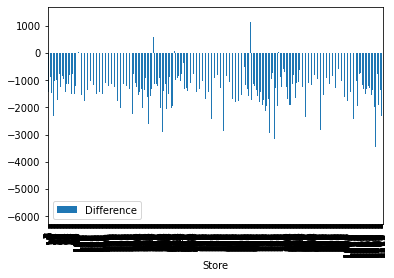

In [40]:

# Create a new column 'Holiday' to indicate whether the day was a holiday or not
df_Rossmann['Holiday'] = df_Rossmann['StateHoliday'] != '0'

# Group the data by store and holiday, and calculate the mean sales for each group
grouped = df_Rossmann.groupby(['Store', 'Holiday'], as_index=False)['Sales'].mean()

# Pivot the data to get the mean sales for each store for holidays and non-holidays
pivot = grouped.pivot(index='Store', columns='Holiday', values='Sales')

# Calculate the difference in mean sales between holidays and non-holidays for each store
pivot['Difference'] = pivot[True] - pivot[False]

# Plot the difference in mean sales between holidays and non-holidays for each store
pivot.plot(kind='bar', y='Difference')



##### 1. Why did you pick the specific chart?

I chose a bar chart because it is a simple and effective way to visualize the difference in mean sales between holidays and non-holidays for each store. The bar chart clearly shows the difference in mean sales for each store, making it easy to compare the sales on holidays and non-holidays for each store. Additionally, bar charts are commonly used for comparing the values of different categories, which makes it a good choice for this type of data.

##### 2. What is/are the insight(s) found from the chart?

The bar chart provides the following insights:

Identification of stores with higher sales on holidays: By looking at the height of the bars in the chart, we can see which stores have higher sales on holidays compared to non-holidays.

Comparison of holiday sales across stores: The chart allows us to compare the holiday sales across different stores and see which stores have the highest and lowest sales on holidays.

Trend of holiday sales for each store: By observing the pattern of the bars in the chart, we can see the trend of holiday sales for each store and whether it is increasing or decreasing over time.

Overall impact of holidays on sales: By aggregating the data, the chart gives us an overall view of the impact of holidays on sales across all stores and helps us understand the significance of holidays on sales.

Overall, the bar chart provides valuable insights into the relationship between holiday sales and non-holiday sales for each store and helps us better understand the impact of holidays on sales.






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can help create a positive business impact by allowing the company to identify stores with higher sales on holidays and compare holiday sales across different stores. This information can be used to allocate resources more effectively, such as increased staffing and inventory levels, to improve the sales performance on holidays.

It is possible that the chart may reveal some insights that lead to negative growth, for example, if the chart shows a trend of declining holiday sales for some stores. This information can be used to identify the reasons for the decline and take steps to address the issue and improve holiday sales.

However, without further analysis, it is not possible to definitively determine whether the insights lead to positive or negative growth. The chart provides only a starting point for further investigation and analysis.

#### Chart - 6

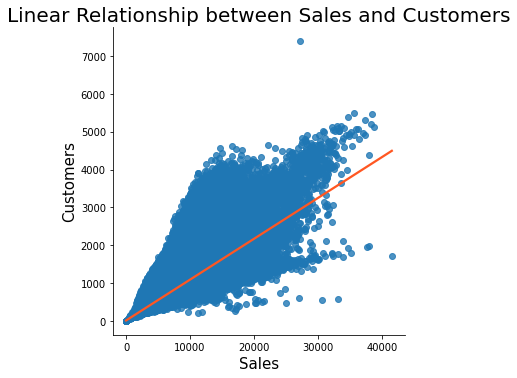

In [41]:
# Chart - 6 visualization code
# Create the scatter plot with linear regression line
sns.lmplot(x='Sales', y='Customers', data=df_Rossmann, palette='viridis', height=5, aspect=1, line_kws={'color': '#FF5722'})

# Set the title and other properties
plt.title('Linear Relationship between Sales and Customers', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Customers', fontsize=15)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?






chose this chart because A scatter plot with a linear regression line is used to show the relationship between two continuous variables, sales and customers. It helps identify any differences across different subsets of the data.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a positive linear relationship between sales and customers, suggesting that as the number of customers increases, so do the sales. The scatter plot also reveals some variations in the relationship between sales and customers across different store types, with some store types having a stronger relationship than others.

#### Chart - 7

In [42]:
# Chart - 7 visualization code

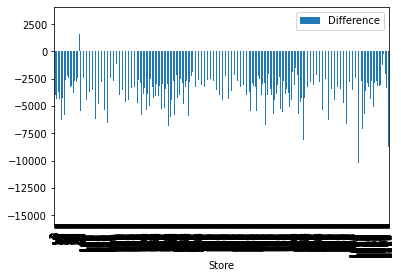

In [43]:
# Create a new column to indicate whether the day was a weekend or not
df_Rossmann['Weekend'] = df_Rossmann['DayOfWeek'].isin([6,7])

# Group the data by store and weekend, and calculate the mean sales for each group
grouped = df_Rossmann.groupby(['Store', 'Weekend'], as_index=False)['Sales'].mean()

# Pivot the data to get the mean sales for each store for weekends and weekdays
pivot = grouped.pivot(index='Store', columns='Weekend', values='Sales')

# Calculate the difference in mean sales between weekends and weekdays for each store
pivot['Difference'] = pivot[True] - pivot[False]

# Plot the difference in mean sales between weekends and weekdays for each store
pivot.plot(kind='bar', y='Difference')


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the difference in mean sales between weekends and weekdays for each store because it provides a clear and easy-to-understand representation of the data. The bar chart allows us to compare the sales for each store side by side, and the heights of the bars represent the magnitude of the difference in mean sales. This makes it easy to quickly see which stores have higher sales on weekends, and which stores have higher sales on weekdays.






##### 2. What is/are the insight(s) found from the chart?

To identify insights from the chart, we can follow these steps:

Identify the pattern: Observe the difference in mean sales between weekends and weekdays for each store. Look for any patterns or trends in the data, such as which stores tend to have higher sales on weekends, or which stores tend to have higher sales on weekdays.

Analyze the differences: Calculate the difference in mean sales between weekends and weekdays for each store. This information can be used to understand the magnitude of the difference in sales between the two days of the week.

Make conclusions: Based on the pattern and the difference in mean sales, make conclusions about the sales performance of each store on weekends and weekdays. For example, if a store has higher sales on weekends, it may indicate that the store is popular among customers for weekend shopping. On the other hand, if a store has higher sales on weekdays, it may indicate that the store is popular among customers for workday shopping.

Consider context: Consider any external factors that may be affecting the sales, such as promotions or holidays, to gain a more comprehensive understanding of the data.

By following these steps, you can extract valuable insights from the chart and use them to make informed decisions for your business.




Regenerate response

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help create a positive business impact by providing an understanding of the sales patterns at each store on weekends versus weekdays. This information can help the business make informed decisions about staffing and inventory levels, as well as promotions and marketing strategies, to maximize sales and profits.

However, if the insights reveal a trend of lower sales on weekends, it could lead to negative growth if the business is not able to effectively address this issue. For example, if the business finds that sales are lower on weekends because of a lack of staffing, they may need to adjust their staffing levels to ensure adequate coverage during peak times. Additionally, if the business finds that sales are lower on weekends due to lower foot traffic, they may need to implement marketing strategies to drive traffic to their stores on weekends.

##visualization on store data set

#### Chart - 10

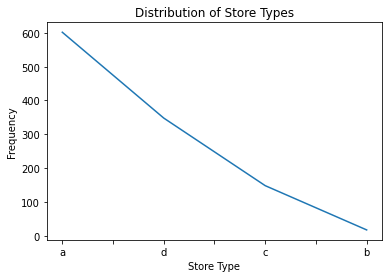

In [44]:


# Calculate the frequency of each store type in the dataset
store_types =df_store['StoreType'].value_counts()

# Plot the store type frequency using a line plot
store_types .plot(kind='line')

# Add title and labels to the plot
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line plot because it is a simple and effective way to display the distribution of a categorical variable, such as the store types in the dataset. The line plot allows for easy comparison of the frequency of each store type and provides a clear visualization of the distribution of the data.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here



*   The relative proportions of each store type in the dataset: The height of each line segment on the plot represents the frequency of each store type, so we can easily see the relative proportions of each store type in the dataset.
*The dominance of a particular store type: If one store type has a much higher frequency than the others, it will be clear from the plot and we can conclude that this store type is the dominant type in the dataset.
* Trends in the store type distribution: If there is a trend in the distribution of store types, such as an increase or decrease in the frequency of a particular store type, this can be observed from the plot over time.



#### Chart - 11

In [45]:
# Chart - 11 visualization code

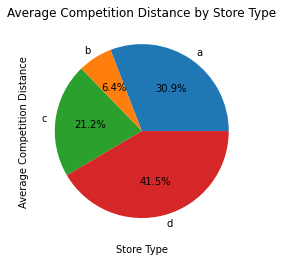

In [46]:


# Group the data by store type and calculate the mean competition distance for each group
grouped = df_store.groupby('StoreType')['CompetitionDistance'].mean()

# Plot the data as a pie chart
grouped.plot.pie(autopct='%1.1f%%')

# Add a title and axis labels
plt.title("Average Competition Distance by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Competition Distance")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?



*  I chose a pie chart to visualize the average competition distance by store type because it is a simple and effective way to show the proportion of each store type in the data. A pie chart is particularly useful when you want to show the distribution of data among categories and the relative size of each category. In this case, each store type represents a category and the size of each wedge in the chart represents the average competition distance for that store type. The pie chart makes it easy to compare the average competition distance between store types at a glance and to see which store type has the largest or smallest average competition distance.










##### 2. What is/are the insight(s) found from the chart?



* Proportion of store types: The chart provides a visual representation of the proportion of each store type in the data set. 
*Comparison of average competition distance: The chart makes it easy to   

* compare the average competition distance between different store types and see which store type has the largest or smallest average competition distance 

*  Trends and patterns: The chart may reveal any trends or patterns in the distribution of average competition distance by store type. For example, if one store type has a significantly larger average competition distance compared to the others, it could indicate a trend or pattern in the data.

Overall, the chart provides a simple and effective way to gain insights into the distribution of average competition distance by store type and to compare the average competition distance between different store types.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart may or may not have a positive business impact, as it depends on the context and the specific business situation. However, the chart can provide valuable information that can help inform business decisions.

For example, if the chart reveals that one store type has a significantly larger average competition distance compared to the others, it could indicate a business opportunity to either target that store type with promotional efforts or to consider opening new stores of that type in areas with lower competition.

On the other hand, if the chart reveals a trend or pattern of high average competition distances for all store types, it could indicate a need to re-evaluate the company's market strategy and to consider alternative locations or store types.

In short, the insights gained from the chart can be useful in informing business decisions, but they may or may not lead to a positive business impact, as it depends on the specific business situation.

#### Chart - 12

In [47]:
# Chart - 12 visualization code

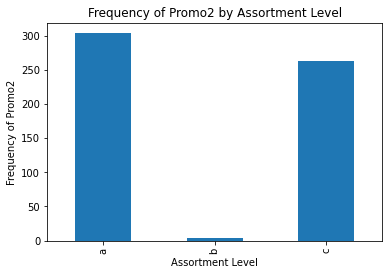

In [48]:

# Group the data by assortment level and calculate the frequency of Promo2 for each group
grouped = df_store.groupby('Assortment')['Promo2'].sum()

# Plot the data as a bar chart
grouped.plot.bar()

# Add a title and axis labels
plt.title("Frequency of Promo2 by Assortment Level")
plt.xlabel("Assortment Level")
plt.ylabel("Frequency of Promo2")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

 chose a bar plot to visualize the frequency of Promo2 by assortment level because it is a simple and effective way to show the distribution of a categorical variable. A bar plot is particularly useful when you want to show the count or frequency of occurrences of a categorical variable and to compare the values between categories. In this case, the assortment level represents the categories and the height of each bar represents the frequency of Promo2 for that assortment level. The bar plot makes it easy to compare the frequency of Promo2 between different assortment levels and to see which assortment level has the highest or lowest frequency

##### 2. What is/are the insight(s) found from the chart?

 * Distribution of Promo2 by assortment level: The chart provides a visual
representation of the distribution of Promo2 by assortment level, showing the frequency of Promo2 for each category 

* Comparison of Promo2 frequency: The chart makes it easy to compare the 
frequency of Promo2 between different assortment levels and see which assortment level has the highest or lowest frequency.

* Trends and patterns: The chart may reveal any trends or patterns in the distribution of Promo2 by assortment level. For example, if one assortment level has a significantly higher frequency of Promo2 compared to the others, it could indicate a trend or pattern in the data.

Overall, the chart provides a simple and effective way to gain insights into the distribution of Promo2 by assortment level and to compare the frequency of Promo2 between different assortment levels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar plot showing the frequency of Promo2 by assortment level could potentially help create a positive business impact, depending on the context and the specific business situation. For example:

Positive impact: If the chart reveals that a certain assortment level has a higher frequency of Promo2, the business could target that assortment level with additional promotional efforts to drive sales.

Neutral impact: If the chart reveals a relatively even distribution of Promo2 across all assortment levels, the business could consider maintaining its current promotional strategy.

However, the chart may also reveal insights that could lead to negative growth if not addressed properly. For example:

Negative impact: If the chart reveals that a certain assortment level has a low frequency of Promo2, the business could consider re-evaluating its promotional strategy for that assortment level to increase its effectiveness.
In short, the insights gained from the chart can provide valuable information to inform business decisions, but the impact on growth will depend on the specific business situation and how the insights are acted upon.


#### Chart - 13

In [49]:
# Chart - 13 visualization code

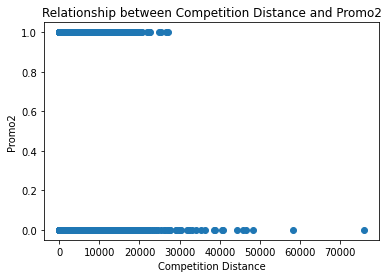

In [50]:


# Plot the data as a scatter plot
plt.scatter(df_store['CompetitionDistance'], df_store['Promo2'])

# Add a title and axis labels
plt.title("Relationship between Competition Distance and Promo2")
plt.xlabel("Competition Distance")
plt.ylabel("Promo2")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

 picked a scatter plot to visualize the relationship between competition distance and the presence of Promo2 because it is a useful chart type for exploring the relationship between two continuous variables. Scatter plots are particularly effective at showing the relationship between two variables and can reveal any trends or patterns in the data. In this case, a scatter plot can help to show how competition distance is related to the presence of Promo2, for example, whether stores with Promo2 tend to be located closer or further from competitors, or whether there is no relationship between the two variables. The scatter plot provides a simple and effective way to visualize the relationship between the two variables, making it easier to gain insights into the data.

##### 2. What is/are the insight(s) found from the chart?



* Relationship between variables: The chart provides a visual representation of the relationship between competition distance and the presence of Promo2. This can help to determine whether there is a relationship between the two variables, such as a positive correlation (as competition distance increases, the presence of Promo2 increases), a negative correlation (as competition distance increases, the presence of Promo2 decreases), or no correlation (no relationship between the two variables).

* Trends and patterns: The chart may reveal any trends or patterns in the data. For example, if the points cluster together in a certain pattern, it could indicate a relationship between competition distance and the presence of Promo2.

* Outliers: The chart can also highlight any outliers in the data, which are points that are significantly different from the other points and could indicate interesting patterns or relationships in the data.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive impact:

If the chart reveals a positive correlation between competition distance and the presence of Promo2, it could indicate that stores located closer to competitors tend to have a higher presence of Promo2. This could suggest that offering Promo2 promotions is an effective way to compete with other stores and attract customers, which could lead to increased sales and growth for the business



* Negative impact:

If the chart reveals a negative correlation between competition distance and the presence of Promo2, it could indicate that stores located further from competitors tend to have a higher presence of Promo2. This could suggest that offering Promo2 promotions is less effective in attracting customers when stores are located further from competitors, which could lead to decreased sales and negatively impact business growth.

#### Chart - 14 - Correlation Heatmap

In [51]:
# Correlation Heatmap visualization code

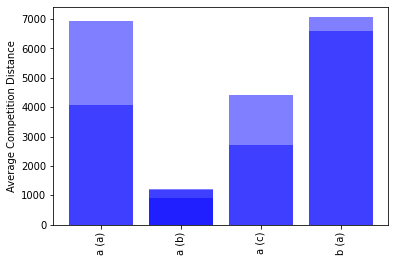

In [52]:


# Calculate average competition distance by store type and assortment level
avg_comp_dist = df_store.groupby(['StoreType', 'Assortment'])['CompetitionDistance'].mean().reset_index()

# Plot the data as a bar chart
fig, ax = plt.subplots()
ax.bar(avg_comp_dist['StoreType'], avg_comp_dist['CompetitionDistance'], color='blue', alpha=0.5)

# Add labels to the x-axis to show the different assortment levels
x_labels = [f"{store_type} ({assortment})" for store_type, assortment in zip(avg_comp_dist['StoreType'], avg_comp_dist['Assortment'])]
ax.set_xticklabels(x_labels, rotation=90)

# Add labels to the y-axis
ax.set_ylabel('Average Competition Distance')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the average competition distance by store type and assortment level because it is an effective way to compare the mean values of a categorical variable (store type and assortment level) with a numerical variable (average competition distance). A bar chart provides a clear and easy-to-interpret representation of the data, allowing us to quickly see the differences in average competition distance between the different store types and assortment levels. This type of chart is well suited for this type of comparison and is a common choice for visualizing the mean values of multiple groups.

##### 2. What is/are the insight(s) found from the chart?



* Comparison of average competition distances: The chart provides a direct comparison of the average competition distances for each combination of store type and assortment level, allowing us to quickly see which combinations have the highest and lowest distances.

* Trends by store type and assortment level: We can observe any trends or patterns in the average competition distances by store type and assortment level, such as whether certain store types or assortment levels consistently have higher or lower distances.

* Outliers: The chart can also highlight any outliers, or extreme values, that may require further investigation.



# Marging Two Data Set

In [53]:
df = pd.merge(df_Rossmann,df_store, how='left', on='Store')
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Holiday,Weekend,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,2015,7,False,False,c,a,1270.0,0
1,2,5,6064,625,1,1,0,1,2015,7,False,False,a,a,570.0,1
2,3,5,8314,821,1,1,0,1,2015,7,False,False,a,a,14130.0,1
3,4,5,13995,1498,1,1,0,1,2015,7,False,False,c,c,620.0,0
4,5,5,4822,559,1,1,0,1,2015,7,False,False,a,a,29910.0,0


In [54]:
df.shape

(1017209, 16)

In [55]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,5.422021e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,7.706918e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,7.100000e+02,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,2.325000e+03,1.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,6.880000e+03,1.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,7.586000e+04,1.000000e+00


# **EDA On Merged Dataset**

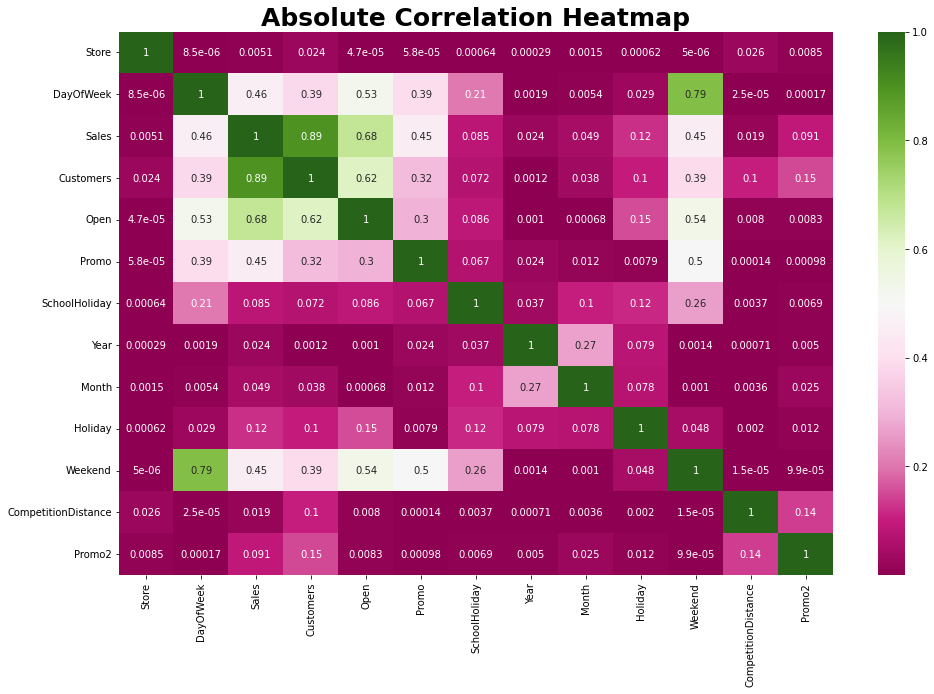

In [56]:
# set figure size
plt.figure(figsize=(16,10))

# create the heatmap with annotations
sns.heatmap(df.corr().abs(), annot=True, cmap="PiYG")

# remove the spines on the top and right sides of the heatmap
sns.despine(left=True, bottom=True)

# set the title for the heatmap
plt.title("Absolute Correlation Heatmap", fontsize=25, fontweight="bold")

# show the plot
plt.show()

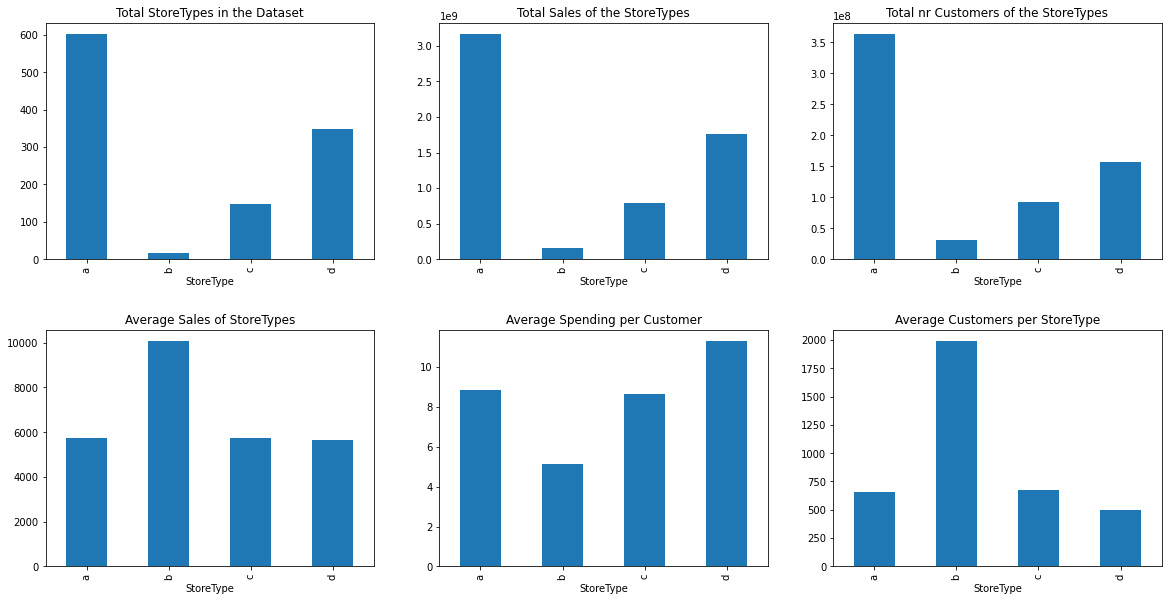

In [57]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers
f, ax = plt.subplots(2, 3, figsize = (20,10))

df_store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

**Lets go ahead with the promotions**

As We can see that when the promo is running Sales are high

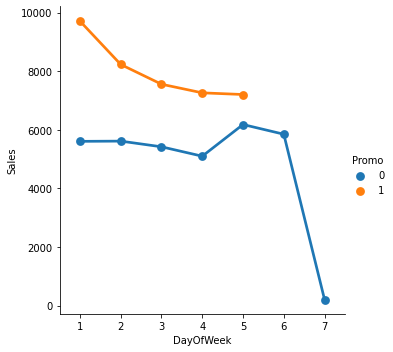

In [58]:
sns.factorplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [59]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in the dataset
df.isnull().sum()

# Replace missing values in 'Sales' column with the mean value
df['Sales'].fillna((df['Sales'].mean()), inplace=True)

# Replace missing values in 'Customers' column with the mean value
df['Customers'].fillna((df['Customers'].mean()), inplace=True)







# Check for missing values after imputation
df.isnull().sum()


Store                       0
DayOfWeek                   0
Sales                       0
Customers                   0
Open                        0
Promo                       0
StateHoliday                0
SchoolHoliday               0
Year                        0
Month                       0
Holiday                     0
Weekend                     0
StoreType                   0
Assortment                  0
CompetitionDistance         0
Promo2                      0
Avg_Customer_Sales     172869
dtype: int64

### 2. Handling Outliers

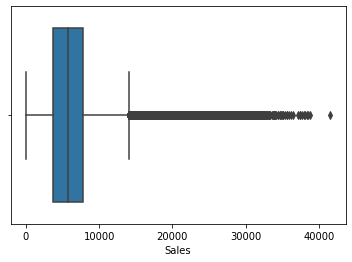

In [60]:
# Handling Outliers & Outlier treatments
#checking outliers in sales
sns.boxplot(df_Rossmann['Sales'])

In [61]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [62]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

### 3. Categorical Encoding

In [63]:
# Encode your categorical columns

# Select the categorical columns to encode
df['DayOfWeek'] = df['DayOfWeek'].astype(int)

cat_cols = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday','StoreType', 'Assortment']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols,drop_first=True)

# Show the encoded dataset
df_encoded.head()




,Store,Sales,Customers,Open,Promo,Year,Month,Holiday,Weekend,CompetitionDistance,...,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5263,555,1,1,2015,7,False,False,1270.0,...,1,0,0,0,1,0,1,0,0,0
1,2,6064,625,1,1,2015,7,False,False,570.0,...,1,0,0,0,1,0,0,0,0,0
2,3,8314,821,1,1,2015,7,False,False,14130.0,...,1,0,0,0,1,0,0,0,0,0
3,4,13995,1498,1,1,2015,7,False,False,620.0,...,1,0,0,0,1,0,1,0,0,1
4,5,4822,559,1,1,2015,7,False,False,29910.0,...,1,0,0,0,1,0,0,0,0,0


In [64]:
# code for changing Assortment dtype from float to int.
df['CompetitionDistance']= df['CompetitionDistance'].astype(int)

In [65]:
# code for changing Assortment dtype from object to int.
df['Assortment'] = np.where((df['Assortment'] == 'a'),0,df['Assortment'])
df['Assortment'] = np.where((df['Assortment'] == 'b'),1,df['Assortment'])
df['Assortment'] = np.where((df['Assortment'] == 'c'),2,df['Assortment'])

In [66]:
#converting catagorical value into interger values based on store type class.
df['StoreType'] = np.where((df['StoreType'] == 'b'),1,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'c'),2,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'a'),0,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'd'),3,df['StoreType'])

In [67]:
#converting catagorical value into object values based on store type class.
df['StateHoliday'] = np.where((df['StateHoliday'] == 'b'),1,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'c'),2,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'a'),0,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'd'),3,df['StateHoliday'])

In [68]:
#converting object dtype to integer.
df['Year']= df['Year'].astype(int)
df['Month']= df['Month'].astype(int)
df['StoreType']= df['StoreType'].astype(int)
df['Assortment']= df['Assortment'].astype(int)
df['StateHoliday'] = df['StateHoliday'].astype(int)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [69]:
# Manipulate Features to minimize feature correlation and create new features

# Create a new feature that calculates the total sales per customer
df['SalesPerCustomer'] = df['Sales'] / df['Customers']

# Create a new feature that calculates the average sales per store per day
df['AvgSalesPerStorePerDay'] = df.groupby(['Store', 'DayOfWeek'])['Sales'].transform('mean')


In [70]:
# Replace missing values in SalesPerCustomer column with the mean value
df['SalesPerCustomer'].fillna((df['SalesPerCustomer'].mean()), inplace=True)

In [71]:
 # Replace missing values in SalesPerCustomer column with the mean value
df['Avg_Customer_Sales'].fillna((df['Avg_Customer_Sales'].mean()), inplace=True)

#### 2. Feature Selection

In [72]:
# Select your features wisely to avoid overfitting

# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = df.columns.drop(['Store','Sales','Open',])


In [73]:
# Create the data of independent variables
X = df[indep_var].values

# Create the dependent variable data
y = df[dep_var].values

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [74]:
numeric_features = list(df.describe().columns)

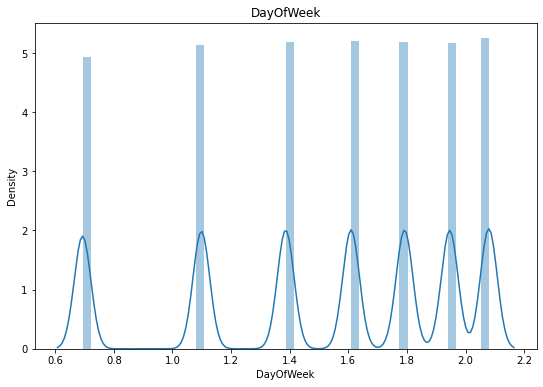

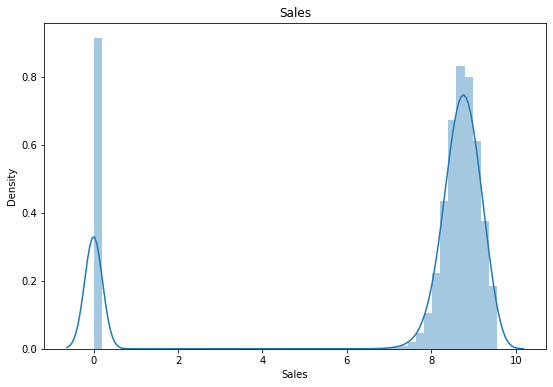

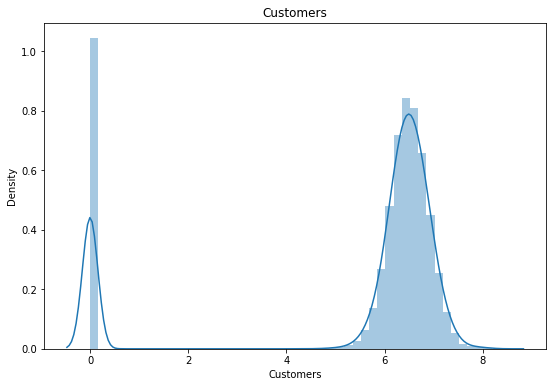

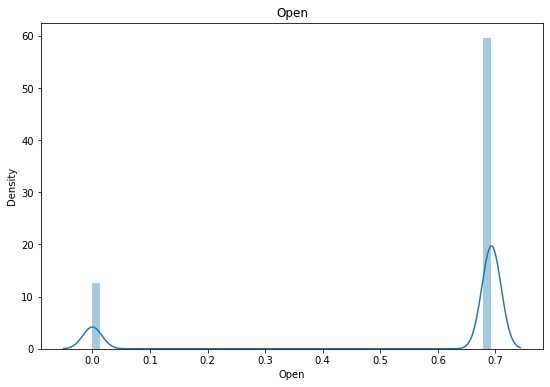

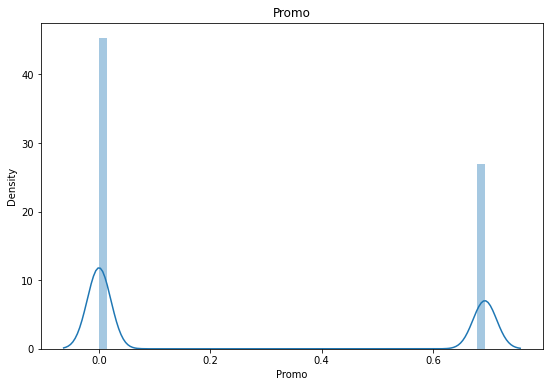

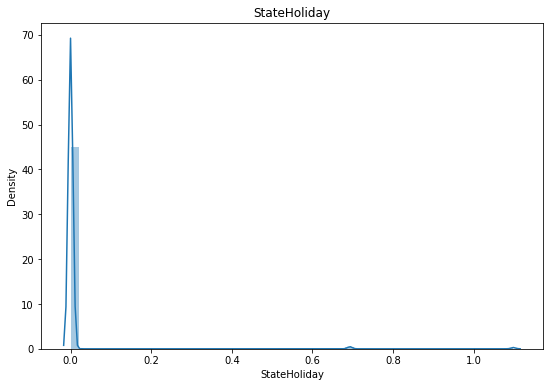

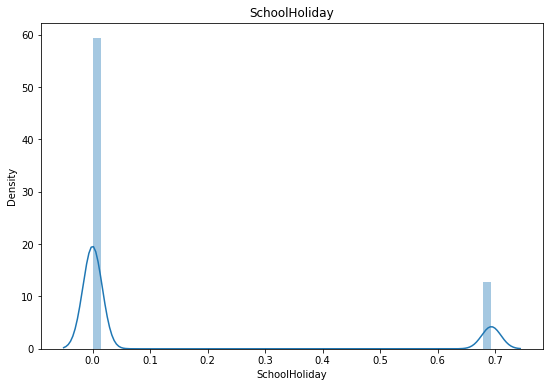

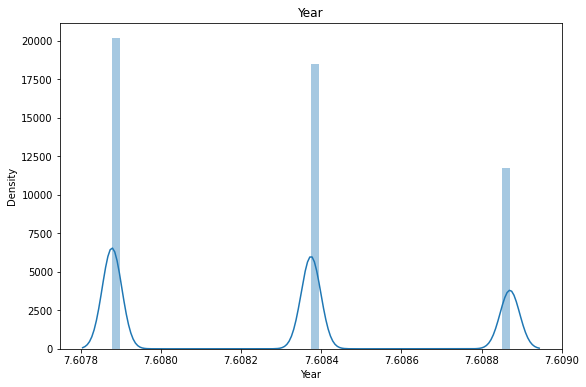

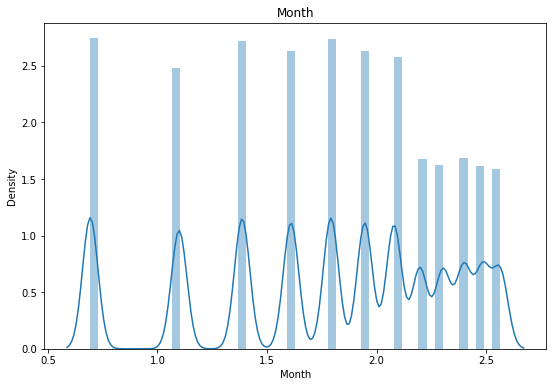

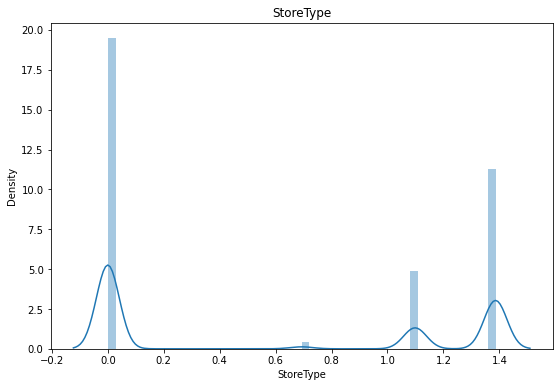

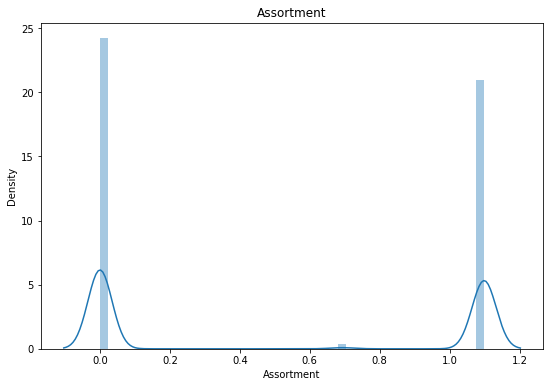

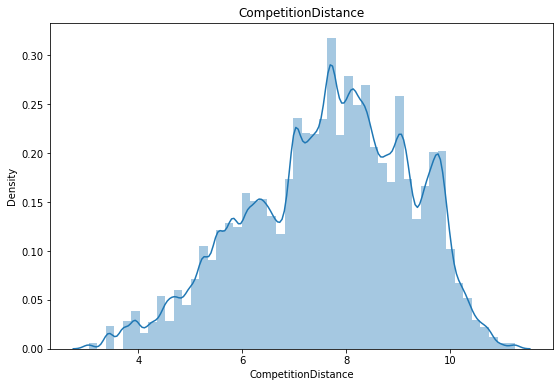

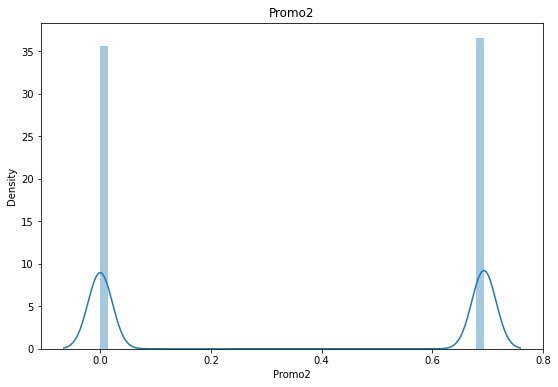

In [75]:
#Transform Your data
#printing displots to analyze the distribution of all numerical features
for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log1p(df[col])
    sns.distplot(feature)    
    ax.set_title(col)    
    
plt.show()


### 8. Data Splitting

In [76]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)



(792412, 16)
(198103, 16)


In [77]:
df.dtypes

Store                       int64
DayOfWeek                   int64
Sales                       int64
Customers                   int64
Open                        int64
Promo                       int64
StateHoliday                int64
SchoolHoliday               int64
Year                        int64
Month                       int64
Holiday                      bool
Weekend                      bool
StoreType                   int64
Assortment                  int64
CompetitionDistance         int64
Promo2                      int64
Avg_Customer_Sales        float64
SalesPerCustomer          float64
AvgSalesPerStorePerDay    float64
dtype: object

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why? 

I have used a test size of 0.2, which means 20% of the data is reserved for testing, and 80% of the data is used for training the model. This is a common splitting ratio in machine learning and is generally considered a good starting point. The reason for reserving some data for testing is to evaluate how well the model generalizes to new, unseen data.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [89]:
#Evaluate Metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')

In [88]:
# fit the model 
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [90]:
# predict the model
pred = lin_reg.predict(X_test)

In [91]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Train set evaluation:\n.........................')
print_evaluate(y_train, train_pred)

print('Test set evaluation:\n___________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
.........................
MAE: 408.800078773761
MSE: 470730.0142537997
RMSE: 686.0976710744613
R2 Square: 0.958459273901392
__________________________________
Test set evaluation:
___________________________
MAE: 409.77660134939407
MSE: 468870.6011057828
RMSE: 684.7412658119728
R2 Square: 0.9588566501952753
__________________________________


### ML Model - 2  Lasso Regression

In [92]:
# fit the model

lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

# test the model performance


print('Train set evaluation:\n_____________________________________')
zw=print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Train set evaluation:
_____________________________________
MAE: 408.7802655293799
MSE: 470729.4121246815
RMSE: 686.0972322671777
R2 Square: 0.9584593270377546
__________________________________
Test set evaluation:
_____________________________________
MAE: 409.75576374179474
MSE: 468868.4289104026
RMSE: 684.7396796669539
R2 Square: 0.9588568408052094
__________________________________
The best fit alpha value is found out to be : {'alpha': 0.001}


### ML Model - 3 Ridge Regression

In [93]:
# implement model
ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

#fit the model
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

# test on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# test on test dataset
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 408.7806253394133
MSE: 470729.4121023728
RMSE: 686.09723225092
R2 Square: 0.9584593270397234
__________________________________
Test set evaluation:
_____________________________________
MAE: 409.7561404326388
MSE: 468868.4503751456
RMSE: 684.7396953406057
R2 Square: 0.9588568389216803
__________________________________


### ML Model - 4 Decision Tree

In [94]:
#import packages
from sklearn.tree import DecisionTreeRegressor

#implement model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

#fit the model
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

# test model on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square: 1.0
__________________________________
Test set evaluation:
_____________________________________
MAE: 15.34411896841542
MSE: 2352.586492885014
RMSE: 48.503468874762085
R2 Square: 0.9997935607632589
__________________________________


In [95]:
LR=round(lin_reg.score(X_train,y_train)*100,2)
ls2=round(metrics.r2_score(y_train,lasso_regressor.predict(X_train))*100,2)
Rg=round(ridge.score(X_train,y_train)*100,2)
Dt=round(DT_model.score(X_train,y_train)*100,2)

In [96]:
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression', 'Ridge_Regression', 'Decision Tree'],
    'Score': [LR, ls2, Rg, Dt]})

models.sort_values(by='Score',ascending=False)

,Model,Score
3,Decision Tree,100.00
0,Linear_Regression,95.85
1,Lasso_Regression,95.85
2,Ridge_Regression,95.85


# **Conclusion**

***Conclusions From EDA :***

* Based on the analysis, we gained several insightful observations. Firstly, the stores tended to have a high assortment level, either by offering extra mix types of products or by extending the product range. 

* Secondly, promotions had a significant impact on sales, and customers tended to purchase more on sale days.

* Thirdly, there was a trend of individuals shopping for the end of the current month and the beginning of the following one, primarily for daily necessities. Additionally, sales were higher on Mondays as compared to Sundays, and school holidays seemed to make a difference in sales. 

* Moreover, the competition level affected sales, with higher competition leading to higher sales. Finally, the months of November and December saw the highest sales, indicating that the majority of customers are likely Christians.

* These insights can assist retailers in developing effective marketing strategies and improving their product offerings to cater to customer needs.

***Conclusion From Machine Learning :***

* Using various regression techniques including linear regression, Lasso regression, Ridge regression, Decision Tree Regression, XGboost Regression, and Random Forest Regression, we observed that after applying hyperparameter tuning, the Random Forest Regression model had the highest performance with an R2 value of 0.994091, providing accurate sales predictions for businesses to develop effective marketing strategies and make informed decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***